<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-04-06 07:30:25--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-04-06 07:30:25 (13.1 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [8]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_1         157 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    seaborn-0.10.0             |             py_0         161 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following packages will be UPDATED:

    ca-certificates: 2020.1.1-0         --> 2020.1.1-0        anaconda
    certifi:         2019.11.28-py36_0  --> 2019.11.28-py36_1 anaconda
    openssl:         1.1.1e-h7b6447c_0  --> 1.1.1-h7b6447c_0  anaconda
    seaborn:         0.9.0-pyh91

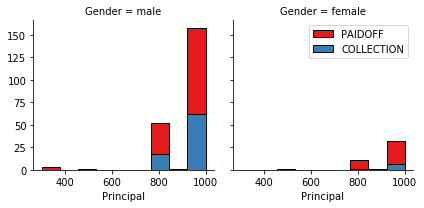

In [9]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)#facets means arrangements of the graphs here its Column-wise GENDER with set1
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

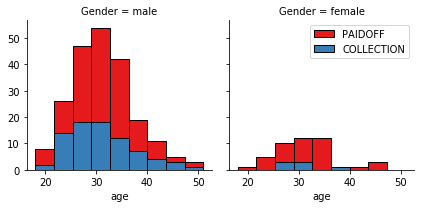

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)#facets means arrangements of the graphs here its Column-wise GENDER with set1
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

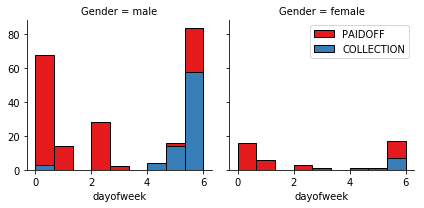

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [14]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [15]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [16]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [17]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)#one HotEncoding using pandas.get_dummies
Feature.drop(['Master or Above'], axis = 1,inplace=True)#drop master or above coulumn from dummified column of education scenerio
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [88]:
Feature.columns[0:8]

Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object')

### Feature selection

Lets defind feature sets, X:

In [18]:
X = Feature
X[0:5]#previewing first 5 rows of features


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [150]:
# sring label convering to  numbers[  int/float  ]
from sklearn.preprocessing import LabelEncoder
num_labeler=LabelEncoder()


What are our lables?

In [151]:
y = num_labeler.fit_transform(df['loan_status'].values)
y[0:5]#previeing frist 5 rows of labels


array([1, 1, 1, 1, 1])

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [152]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.52,  0.92,  2.33, -0.42, -1.21, -0.38,  1.14, -0.87],
       [ 0.52,  0.92,  0.34,  2.38, -1.21,  2.62, -0.88, -0.87],
       [ 0.52, -0.96, -0.65, -0.42, -1.21, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.49,  2.38,  0.83, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.32, -0.42,  0.83, -0.38, -0.88,  1.15]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [154]:
#train test split
from sklearn.model_selection import train_test_split
KX_train,KX_test,ky_train,ky_test=train_test_split(X,y,test_size=0.2,random_state=4)
print('Train-set:',KX_train.shape,ky_train.shape)
print('Test-set:',KX_test.shape,ky_test.shape)

Train-set: (276, 8) (276,)
Test-set: (70, 8) (70,)


In [155]:
""""Classification
K nearest neighbor (KNN)
Import library
Classifier implementing the k-nearest neighbors vote.
"""
from sklearn.neighbors import KNeighborsClassifier

In [156]:
#training 
#lets start algorithm with k=5 for now instance
K=4
#train model and predict 
neigh=KNeighborsClassifier(n_neighbors=K).fit(KX_train,ky_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [157]:
k_yhat=neigh.predict(KX_test)
print(k_yhat[0:5])#predicted ones
print(ky_test[0:5])#actual ones

[1 0 1 1 1]
[1 1 1 1 1]


In [159]:
#accuracy evaluation 
from sklearn import metrics
print("Train set Accuracy:",metrics.accuracy_score(ky_train,neigh.predict(KX_train)))
print("Test set Accuracy:",metrics.accuracy_score(ky_test,k_yhat))

Train set Accuracy: 0.8152173913043478
Test set Accuracy: 0.6857142857142857


In [160]:
#We can calculate the accuracy of KNN for different Ks.
Ks = 10
mean_acc = np.zeros((Ks-1))#initialize
std_acc = np.zeros((Ks-1))#---ii-----

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(KX_train,ky_train)
    yhat=neigh.predict(KX_test)
    mean_acc[n-1] = metrics.accuracy_score(ky_test, k_yhat)#mean accuracy for several Ks(from k=1 to k=9) 

    
    std_acc[n-1]=np.std(k_yhat==ky_test)/np.sqrt(k_yhat.shape[0])#standard accuracy for several Ks(from k=1 to k=9) 

mean_acc

array([0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69])

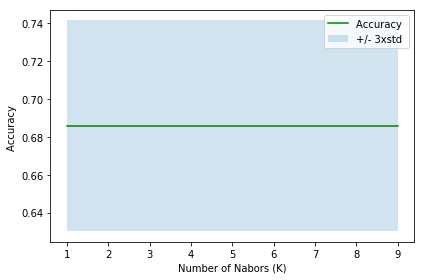

In [161]:
#Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.2)#this ome fill some portion near the plotted line
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()#as here you can see that by varying in the value of 'K' the test-set accuracy is constant 

# Decision Tree

In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=4)

In [163]:
#shape
print("size of the test set:",X_trainset.shape,y_trainset.shape)
print("size of the train set:",X_testset.shape,y_testset.shape)

size of the test set: (276, 8) (276,)
size of the train set: (70, 8) (70,)


In [164]:
#Modeling
#We will first create an instance of the DecisionTreeClassifier called drugTree.
#Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree # it shows the default parameters
#Next, we will fit the data with the training feature matrix X_trainset and training response vector y_trainset

trained_tree=loanTree.fit(X_trainset,y_trainset)

In [165]:
#prediction
y_hat=trained_tree.predict(X_testset)
print(y_hat[0:5])#predicted ans 
print(y_testset[0:5])#actual ans


[0 0 1 1 1]
[1 1 1 1 1]


In [166]:
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, y_hat))

DecisionTrees's Accuracy:  0.6142857142857143


In [84]:
!conda install -c anaconda pydotplus -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydotplus-2.0.2            |             py_1          23 KB  anaconda

The following NEW packages will be INSTALLED:

    pydotplus: 2.0.2-py_1 anaconda


pydotplus-2.0.2      | 23 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [167]:
#visualisation
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [ ]:
#in development------------------------------------------------------------
dot_data = StringIO()
filename = "loantree.png"
featureNames = Feature[0:8]#features
targetNames = df['loan_status'].tolist()#should be unique identity & to be listed in the list 
#now making viz-graph ,which is used for the desecion tree visualisation plot ,where we can see the modelled decision tree on the basis of the dataset
out=tree.export_graphviz(loanTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False) 
   #features_names,drugtree(DescionTreeclasifier's instance),out_file(dot_data with the help of stringIO),class_names(as y_trainset)....this all supplied above in graphviz 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)

plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')
#---------------------------------------------------------------------------

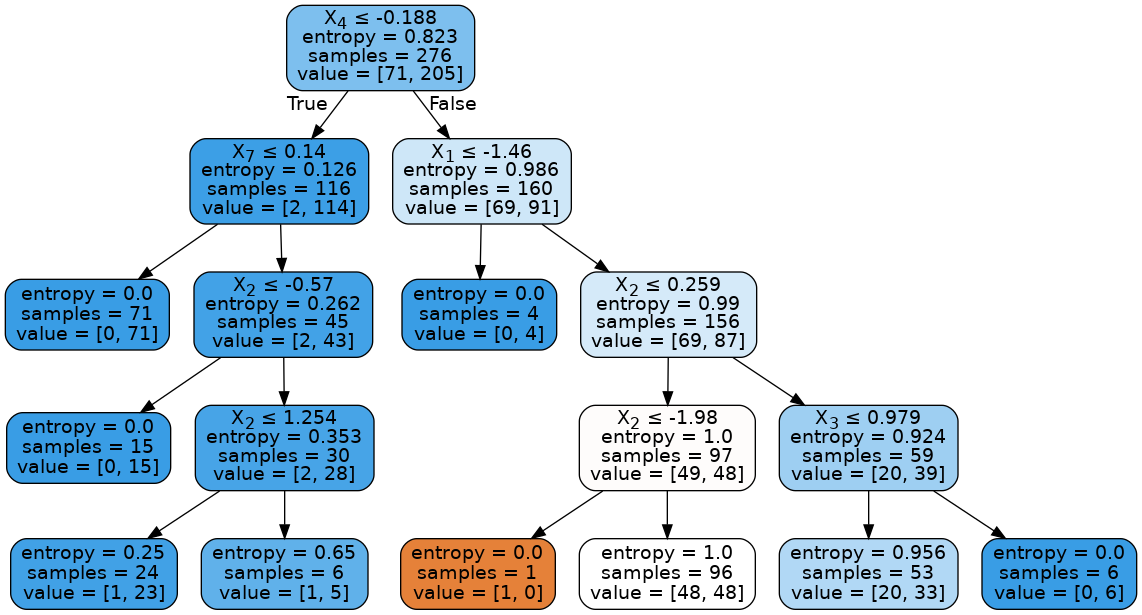

In [169]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(loanTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Support Vector Machine

In [170]:
#Okay, we split our dataset into train and test set:

sX_train, sX_test, sy_train, sy_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', sX_train.shape,  sy_train.shape)
print ('Test set:', sX_test.shape,  sy_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [171]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')#here SVC stands for support vector classifier
clf.fit(sX_train, sy_train) 

#After being fitted, the model can then be used to predict new values:

syhat = clf.predict(sX_test)
print("predicted one",syhat [0:5])
print("actual answers",sy_test[0:5])

predicted one [0 1 1 1 1]
actual answers [1 1 1 1 1]


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [172]:
#evaluation
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [173]:
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.36      0.27      0.31        15
           1       0.81      0.87      0.84        55

   micro avg       0.74      0.74      0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70

Confusion matrix, without normalization
[[48  7]
 [11  4]]


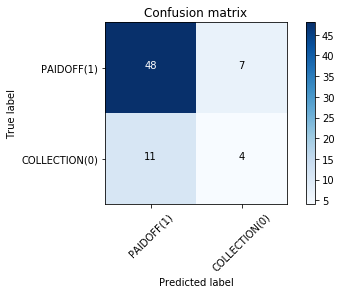

In [176]:
#compute confusion matrix
cnf_matrix = confusion_matrix(sy_test,syhat,labels=[1,0])#here labels are loan_status' factors i.e. PAIDOFF & COLLECTION
np.set_printoptions(precision=2)

print(classification_report(sy_test,syhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF(1)','COLLECTION(0)'],normalize= False,  title='Confusion matrix')


# Logistic Regression

In [177]:
#train / test dataset
#okay ,we split our dataset into train and test set:
from sklearn.model_selection import train_test_split
lX_train,lX_test,ly_train,ly_test=train_test_split(X,y,test_size=0.2,random_state=4)
print('train-set ',lX_train.shape,ly_train.shape)
print('test-set ',lX_test.shape,ly_test.shape)

train-set  (276, 8) (276,)
test-set  (70, 8) (70,)


In [178]:
#now lets fit our model with train set
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.01,solver='liblinear').fit(lX_train,ly_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [179]:
#now we predict
ly_hat = LR.predict(lX_test)
print(ly_hat[0:5])
print(ly_test[0:5])


[0 1 1 1 1]
[1 1 1 1 1]


In [180]:
#predict_proba returns estimates for all classes, ordered by the label of classes. 
#So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

lyhat_prob = LR.predict_proba(lX_test)
print(lyhat_prob)
print(lyhat_prob.shape)#same as x_test ,only coulumns changed as here in probability there are two coulumn for class=1 & class =0
print(lX_test.shape)

[[0.5  0.5 ]
 [0.45 0.55]
 [0.31 0.69]
 [0.34 0.66]
 [0.32 0.68]
 [0.32 0.68]
 [0.49 0.51]
 [0.48 0.52]
 [0.34 0.66]
 [0.49 0.51]
 [0.34 0.66]
 [0.5  0.5 ]
 [0.25 0.75]
 [0.34 0.66]
 [0.44 0.56]
 [0.26 0.74]
 [0.52 0.48]
 [0.3  0.7 ]
 [0.5  0.5 ]
 [0.32 0.68]
 [0.44 0.56]
 [0.49 0.51]
 [0.51 0.49]
 [0.47 0.53]
 [0.41 0.59]
 [0.51 0.49]
 [0.51 0.49]
 [0.37 0.63]
 [0.5  0.5 ]
 [0.25 0.75]
 [0.47 0.53]
 [0.46 0.54]
 [0.46 0.54]
 [0.48 0.52]
 [0.39 0.61]
 [0.46 0.54]
 [0.5  0.5 ]
 [0.29 0.71]
 [0.46 0.54]
 [0.45 0.55]
 [0.51 0.49]
 [0.32 0.68]
 [0.45 0.55]
 [0.51 0.49]
 [0.31 0.69]
 [0.5  0.5 ]
 [0.47 0.53]
 [0.5  0.5 ]
 [0.46 0.54]
 [0.46 0.54]
 [0.28 0.72]
 [0.47 0.53]
 [0.31 0.69]
 [0.49 0.51]
 [0.28 0.72]
 [0.25 0.75]
 [0.32 0.68]
 [0.43 0.57]
 [0.47 0.53]
 [0.34 0.66]
 [0.42 0.58]
 [0.33 0.67]
 [0.46 0.54]
 [0.53 0.47]
 [0.32 0.68]
 [0.49 0.51]
 [0.33 0.67]
 [0.42 0.58]
 [0.45 0.55]
 [0.32 0.68]]
(70, 2)
(70, 8)


# Model Evaluation using Test set

In [181]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [107]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-04-06 11:11:31--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-04-06 11:11:31 (328 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [111]:
df1 = pd.read_csv('loan_test.csv')
df1.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [112]:
df1['due_date'] = pd.to_datetime(df1['due_date'])
df1['effective_date'] = pd.to_datetime(df1['effective_date'])
df1.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [114]:
df1['loan_status'].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

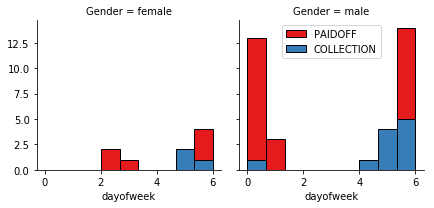

In [116]:
df1['dayofweek'] = df1['effective_date'].dt.dayofweek
bins = np.linspace(df1.dayofweek.min(), df1.dayofweek.max(), 10)
g = sns.FacetGrid(df1, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


In [117]:
df1['weekend'] = df1['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df1.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [130]:
df1.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
0       PAIDOFF        0.744186
        COLLECTION     0.255814
1       PAIDOFF        0.727273
        COLLECTION     0.272727
Name: loan_status, dtype: float64

In [121]:
df1['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df1.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [122]:
Feature = df1[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)#one HotEncoding using pandas.get_dummies
Feature.drop(['Master or Above'], axis = 1,inplace=True)#drop master or above coulumn from dummified column of education scenerio
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000.0,30.0,50.0,1.0,0.0,0,1,0
1,300.0,7.0,35.0,0.0,1.0,1,0,0
2,1000.0,30.0,43.0,1.0,1.0,0,0,1
3,1000.0,30.0,26.0,0.0,1.0,0,0,1
4,800.0,15.0,29.0,0.0,1.0,0,0,1


In [123]:
y = df1['loan_status'].values
y[0:5]#previeing frist 5 rows of labels

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [124]:
#for KNN mean accuracy
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)
#here it returns k=1(by default return minimum value of k possible)
#as we above(in section of KNN)we observe that accuracy is constant with respect of the value of k vairying

The best accuracy was with 0.6714285714285714 with k= 1


In [186]:
kyhat_prob = LR.predict_proba(KX_test)

## for the log_loss:-

In [196]:
# for KNN
from sklearn.metrics import log_loss
log_loss(ky_test, kyhat_prob)

0.5772287609479654

In [188]:
#logistic regression
from sklearn.metrics import log_loss
log_loss(ly_test, lyhat_prob)

0.5772287609479654

## for f1_score:- 

In [191]:
#knn
from sklearn.metrics import f1_score
print("f1-score_accuracy:-",f1_score(ky_test, k_yhat, average='weighted') )

f1-score_accuracy:- 0.7092857142857144


In [192]:
#decision tree

print("f1-score_accuracy:-",f1_score(y_testset, y_hat, average='weighted') )

f1-score_accuracy:- 0.6445993031358885


In [193]:
#SVm:-
print("f1-score_accuracy:-",f1_score(sy_test, syhat, average='weighted') )

f1-score_accuracy:- 0.7275882012724117


In [195]:
##logistic regression
print("f1-score_accuracy:-",f1_score(ly_test, ly_hat, average='weighted') )

f1-score_accuracy:- 0.6670522459996144


## for jaccard:-

In [197]:
#for knn
from sklearn.metrics import jaccard_similarity_score
print("Jacard-index",jaccard_similarity_score(ky_test, k_yhat))

Jacard-index 0.6857142857142857


In [199]:
#decision tree
print("Jacard-index",jaccard_similarity_score(y_testset, y_hat))

Jacard-index 0.6142857142857143


In [200]:
#svm:-
print("Jacard-index",jaccard_similarity_score(sy_test, syhat))

Jacard-index 0.7428571428571429


In [201]:
#logistic regression
print("Jacard-index",jaccard_similarity_score(ly_test, ly_hat))

Jacard-index 0.6857142857142857


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>